# Effectuez une classification hiérarchique

## Fonctionnement de la classification hiérarchique
Sur l'image ci-dessous , le nombre de cluster peut etre  3 , 4 ou même 5 . Tout dépend du contexte et des objectifs.

![](../assets/cluster_classification.png)

3 comme nombre de clusters peut relever d'une vue très générale  et 5 pour une analyse plus fine , plus en profondeur .

On peut diviser des clusters ainsi de suite et obtenir des sous-clusters. 

Cette notion de `"sous-clusters"` est résumable par un arbre :

![](../assets/arbre_clusters.png)

**note** : La notion de profondeur est visible à travers l'axe verticale.


`une classification hierarchique permet de créer un arbre qui regroupe les différents d'individus de façon plus ou moins forte en fonction de la profondeur choisie.`



**attention** : En classification hiérarchique quand on fait du clustering un cluster ne peut et ne doit avoir que deux et seulement deux clusters enfant et un cluster parent.


## Classification ascendante et descendante

Il y a deux approches pour créer une partition hiérarchique

### Approche ascendante ou clustering agglomératif 

On considère chaque point comme un cluster

On cherche les deux clusters les plus proches qu'on agglomère en un grand cluster. 

On repète cette étape jusqu'à ce que tous les points soient regroupés en un grand cluster.


### Approche descendante ou clustering divisif
 c'est l'inverse. On part d'un grand cluster contenant tous les points, puis on le divise successivement jusqu'à obtenir autant de clusters que de points.

 **conclusion** : On obtient une arborescence qui a un cluster tout en haut et qui se divise successivement jusqu'a avoir autant de clusters que de points.

 Cette arborescence se nomme `un dendrogramme`.

 ## Le dendrogramme
Il s'agit d'un outil indispensable en classification hierarchique.
Il désigne l'arbre qui regroupe les clusters.

![](../assets/dendrogramme.png)


La clé ici c'est la distance entre  clusters . Plus elle est grande plus il y a de clusters.

Si on voulait un nombre de clusters on couperait l'arbre à : 
- 1000 pour 2.
- 600 pour 3.
- 200 pour 4.

Avec un nombres élevé de point on represente souvent que **le haut de l'arborescence**

## Méthode des liens et méthode de Ward

Que ce soit avec l'approche accendante ou descendante on a besoin de méthodes de lien  (linkage methods) pour nous aider à mesurer la distance entre deux clusters.

- **lien simple (simple linkage)**: la distance entre deux clusters est la distance entre leurs 2 points les plus proches.

- **lien complet (complete linkage)** : la distance entre deux clusters est la distance entre leurs 2 points les plus éloignés.

- **lien moyen** : la distance entre deux clusters est la moyenne des distances de toutes les paires de points possible entre les deux clusters.

- **lien centroïdal** : on considère que la distance entre 2 clusters est la distance entre les centroïdes de ceux-ci.


**note** : les méthodes de liens garantissent que les clusters sont bien séparées mais pas qu'ils soient bien resserés sur eux-même. 

Pour résoudre ça on utilise la méthode de ward qui à chaque itération (regroupement de 2 clusters en 1) cherche à minimiser l'augmentation d'inertie intraclasse.

## Avantages et inconvénients

- Ne nécessite pas de determiner un nombre de classes au prélable ;
- Choisir le nombre de classe qui convient le mieux en observant le dendrogramme ;

- Complexité en temps et en espace `forte` ;

**conclusion** : le clustering hierarchique est donc plus adaptée aux petits échantillons.

**note** : Sur un échantillon volumineux on peut combiner le k-means qui nous donnnent des clusters dont on extrait des centroïdes sur lequels on applique  la classification hiérarchique  pour choisir grâce au dendrogramme un nombre de cluster qui convient. 

`la classification hierarchique est un algorithme déterministe`



## Pratique

In [3]:
# Importons nos librairies

import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from sklearn import datasets

from scipy.cluster.hierarchy import dendrogram, linkage



In [4]:
# Chargement des données
iris = datasets.load_iris()

# On extrait les données
X = iris.data

# Transformation en dataframe
X = pd.DataFrame(X)

# Affichage d'un extrait du df
X.head()



,0,1,2,3
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


In [6]:
# Calcul des distances
Z = linkage(X,method="ward")

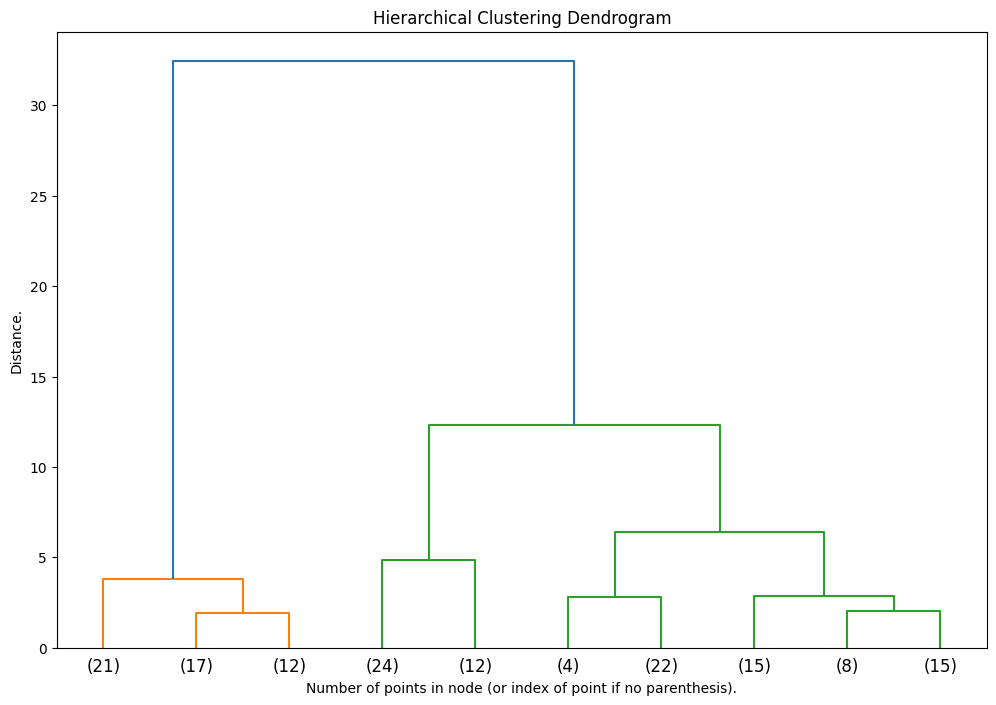

In [9]:
# Graphique avec p=10 clusters affichés
fig,ax = plt.subplots(1,1,figsize=(12,8))

_ = dendrogram(Z,p=10,truncate_mode="lastp",ax=ax)
plt.title("Hierarchical Clustering Dendrogram")
plt.xlabel("Number of points in node (or index of point if no parenthesis).")
plt.ylabel("Distance.")
plt.show()